# ACTIVIDAD 2: ANÁLISIS DE COMUNIDADES
## Redes Sociales, Colaboración en Red

**Autores:**  

Martín Salinas Antón - martin.salinas@estudiante.uam.es  
Belén Vivas García - belen.vivas@estudiante.uam.es

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Zachary's karate club is a social network of a university karate club, described in the paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary.

In [3]:
data_path = "./data/zachary.graphml"
karate = nx.read_graphml(data_path)
print(f"Grafo con {karate.number_of_nodes()} nodos y {karate.number_of_edges()} arcos")
karate_undirected = karate.to_undirected()
nx.is_directed(karate_undirected)

Grafo con 34 nodos y 78 arcos


False

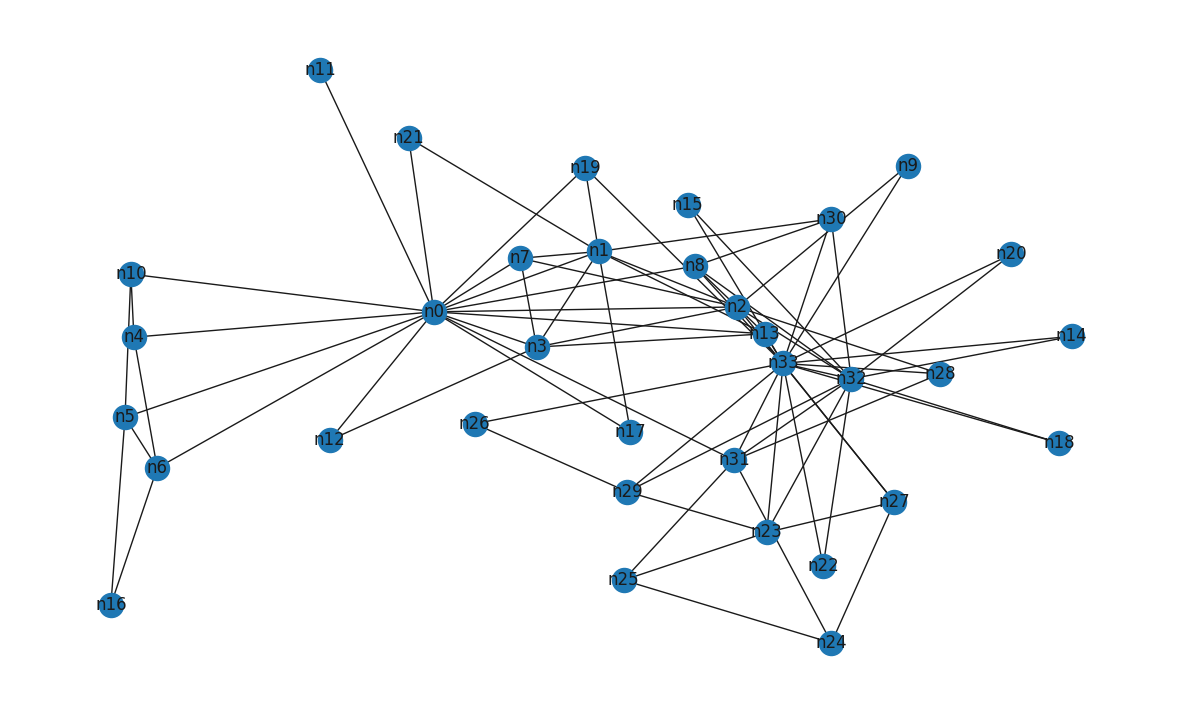

In [4]:
# diagrama
# genero el layout para poder guardarlo y reusarlo en otros gráficos
pos_karate = nx.spring_layout(karate_undirected,  iterations=15, scale=10, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis('off')
sns.set_theme(style="whitegrid")
nx.draw_networkx(karate_undirected, pos=pos_karate, ax=ax)

## Centralidad de Grado

In [5]:
degree_c = nx.degree_centrality(karate_undirected)
sorted_degree = sorted(degree_c.items(), key=lambda item: item[1], reverse=True)
sorted_degree

[('n33', 0.5151515151515151),
 ('n0', 0.48484848484848486),
 ('n32', 0.36363636363636365),
 ('n2', 0.30303030303030304),
 ('n1', 0.2727272727272727),
 ('n3', 0.18181818181818182),
 ('n31', 0.18181818181818182),
 ('n8', 0.15151515151515152),
 ('n13', 0.15151515151515152),
 ('n23', 0.15151515151515152),
 ('n5', 0.12121212121212122),
 ('n6', 0.12121212121212122),
 ('n7', 0.12121212121212122),
 ('n27', 0.12121212121212122),
 ('n29', 0.12121212121212122),
 ('n30', 0.12121212121212122),
 ('n4', 0.09090909090909091),
 ('n10', 0.09090909090909091),
 ('n19', 0.09090909090909091),
 ('n24', 0.09090909090909091),
 ('n25', 0.09090909090909091),
 ('n28', 0.09090909090909091),
 ('n9', 0.06060606060606061),
 ('n12', 0.06060606060606061),
 ('n14', 0.06060606060606061),
 ('n15', 0.06060606060606061),
 ('n16', 0.06060606060606061),
 ('n17', 0.06060606060606061),
 ('n18', 0.06060606060606061),
 ('n20', 0.06060606060606061),
 ('n21', 0.06060606060606061),
 ('n22', 0.06060606060606061),
 ('n26', 0.060606060

Text(0, 0.5, 'Counts')

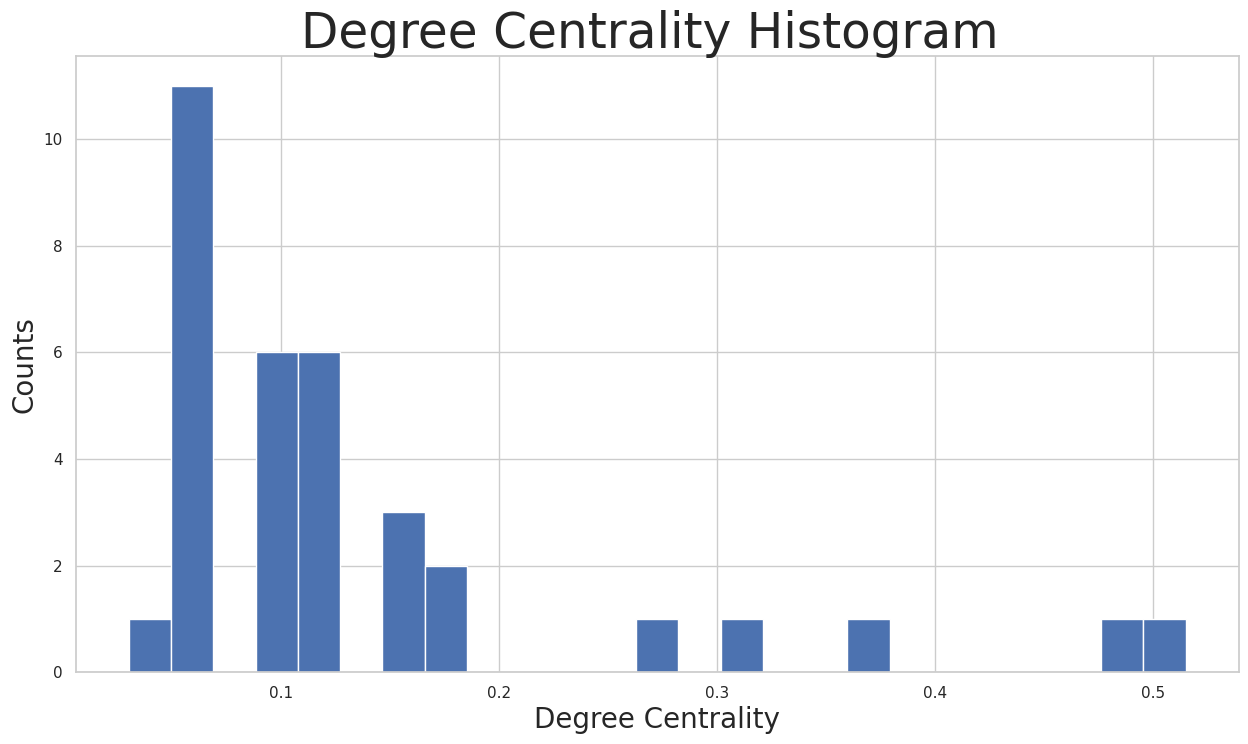

In [6]:
plt.figure(figsize=(15,8))
plt.hist(degree_c.values(), bins=25)
plt.title('Degree Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Degree Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

(-11.974948366841378, 10.783980431997353, -8.88806008653366, 9.261304725773643)

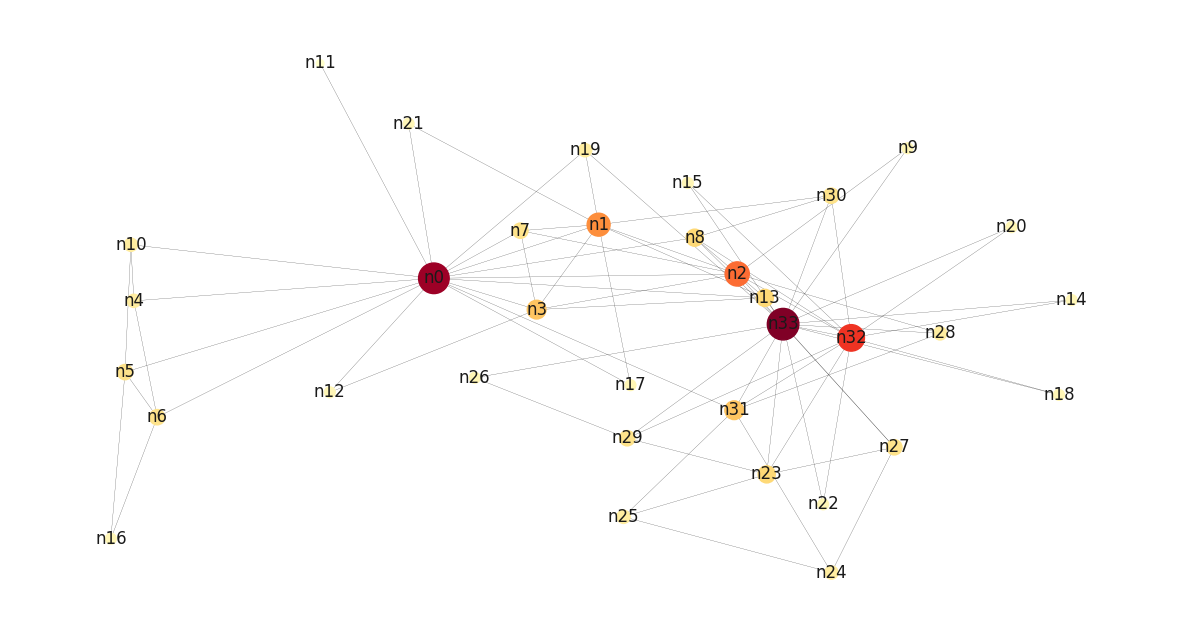

In [7]:
# transformo los valores de centralidad en números aptos para mapa de color [0:255]
min_value = np.min([v for v in degree_c.values()])
max_value = np.max([v for v in degree_c.values()])
factor = 1 / max_value
mapped_values = [(v - min_value)*255*factor for v in degree_c.values()]
node_size =  [v * 1000 for v in degree_c.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(karate_undirected, pos=pos_karate, node_color=mapped_values, 
                 node_size=node_size, with_labels=True, width=0.15, cmap=plt.cm.YlOrRd) #, gist_heat, eismic, viridis
# para mas mapas de color ver https://matplotlib.org/stable/gallery/color/colormap_reference.html
plt.axis('off')

## Centralidad Betweenness

In [8]:
betweenness_c = nx.betweenness_centrality(karate_undirected)
sorted_betweenness = sorted(betweenness_c.items(), key=lambda item: item[1], reverse=True)
sorted_betweenness[:10]

[('n0', 0.43763528138528146),
 ('n33', 0.30407497594997596),
 ('n32', 0.145247113997114),
 ('n2', 0.14365680615680618),
 ('n31', 0.13827561327561325),
 ('n8', 0.05592682780182781),
 ('n1', 0.053936688311688304),
 ('n13', 0.04586339586339586),
 ('n19', 0.03247504810004811),
 ('n5', 0.02998737373737374)]

Text(0, 0.5, 'Counts')

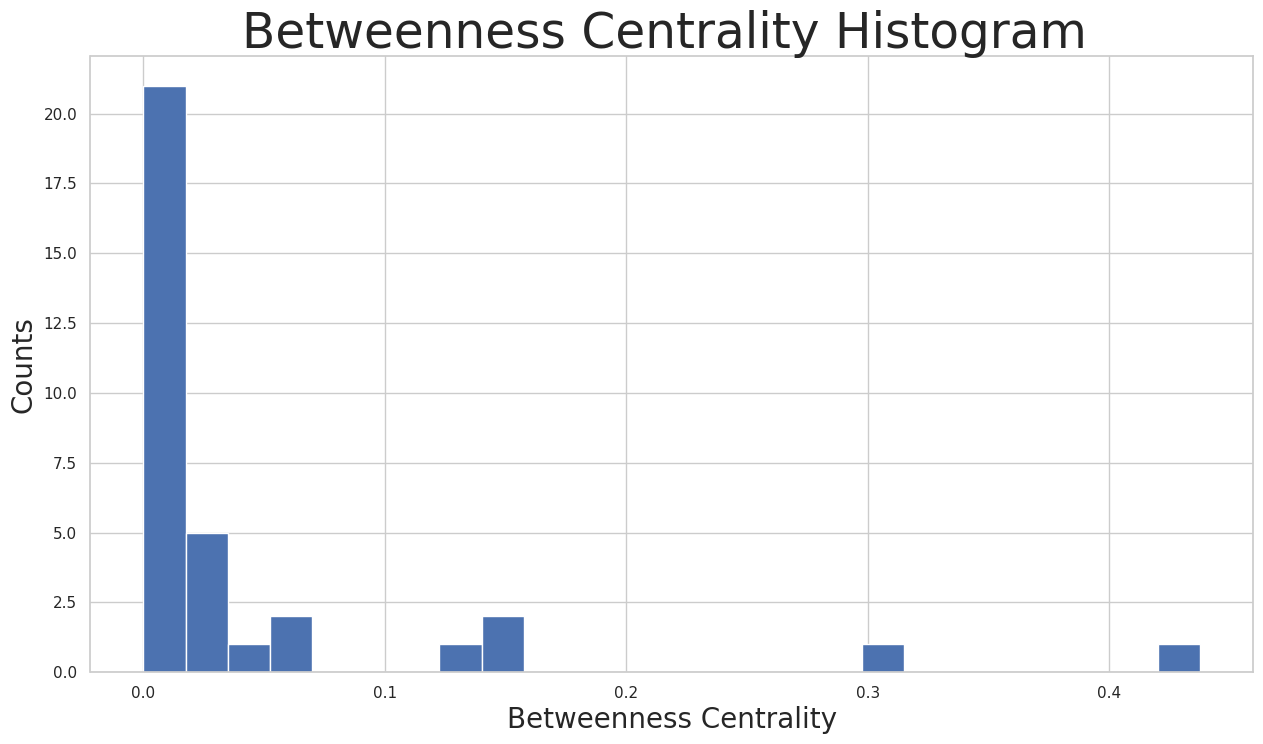

In [9]:
plt.figure(figsize=(15,8))
plt.hist([v for v in betweenness_c.values()], bins=25) 
plt.title('Betweenness Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Betweenness Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

(-11.974948366841378, 10.783980431997353, -8.88806008653366, 9.261304725773643)

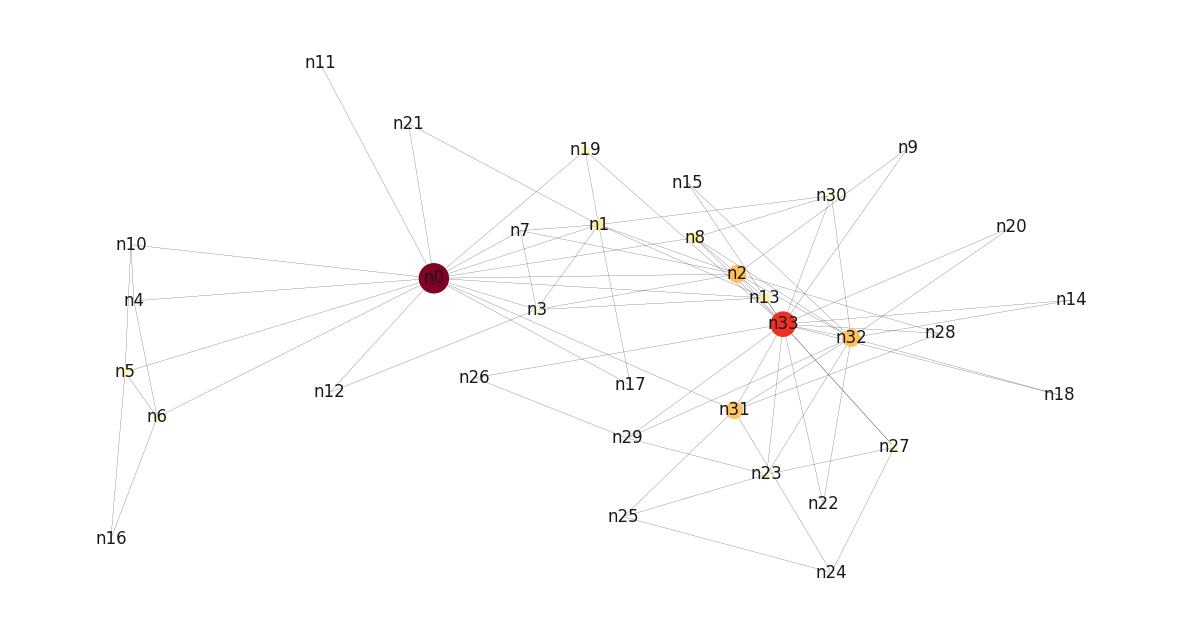

In [10]:
min_value = np.min([v for v in betweenness_c.values()])
max_value = np.max([v for v in betweenness_c.values()])
factor = 1 / max_value
mapped_values = [(v - min_value)*255*factor for v in betweenness_c.values()]
node_size =  [v * 1000 for v in betweenness_c.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(karate_undirected, pos=pos_karate, node_color=mapped_values, 
                 node_size=node_size, with_labels=True, width=0.15, cmap=plt.cm.YlOrRd) #, gist_heat, eismic, viridis
plt.axis('off')

## Centralidad de Vector Propio

Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. 
The eigenvector centrality for node *i* is the *i-th* element of the vector *x* defined by the equation

$Ax = λx$

where *A* is the adjacency matrix of the graph *G* with eigenvalue *λ*. 

By virtue of the Perron–Frobenius theorem, there is a unique solution x, all of whose entries are positive, if λ is the largest eigenvalue of the adjacency matrix A.

In [11]:
eigenvector_c = nx.eigenvector_centrality(karate_undirected, max_iter=100)
sorted_eigenvector = sorted(eigenvector_c.items(), key=lambda item: item[1], reverse=True)
sorted_eigenvector[:8]

[('n33', 0.373371213013235),
 ('n0', 0.3554834941851943),
 ('n2', 0.3171893899684447),
 ('n32', 0.30865104773369595),
 ('n1', 0.2659538704545025),
 ('n8', 0.2274050914716605),
 ('n13', 0.22646969838808145),
 ('n3', 0.21117407832057059)]

Text(0, 0.5, 'Counts')

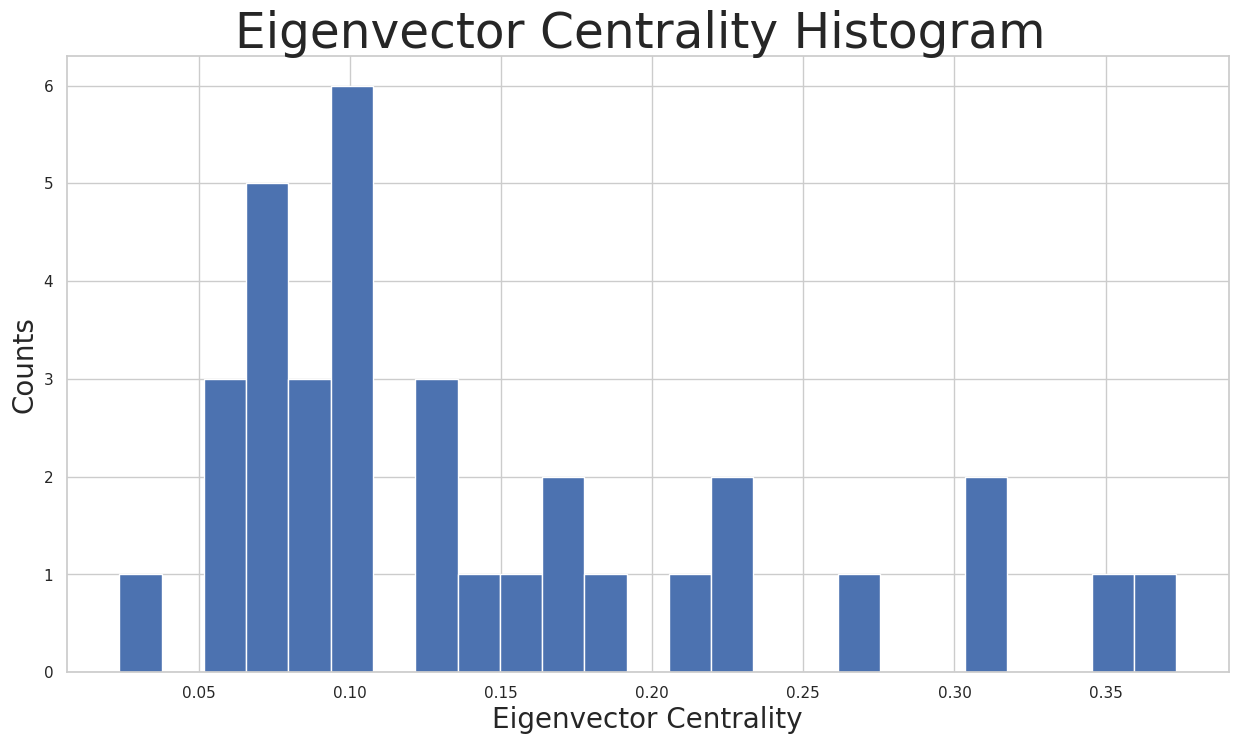

In [12]:
plt.figure(figsize=(15,8))
plt.hist([v for v in eigenvector_c.values()], bins=25) 
plt.title('Eigenvector Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Eigenvector Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

(-11.974948366841378, 10.783980431997353, -8.88806008653366, 9.261304725773643)

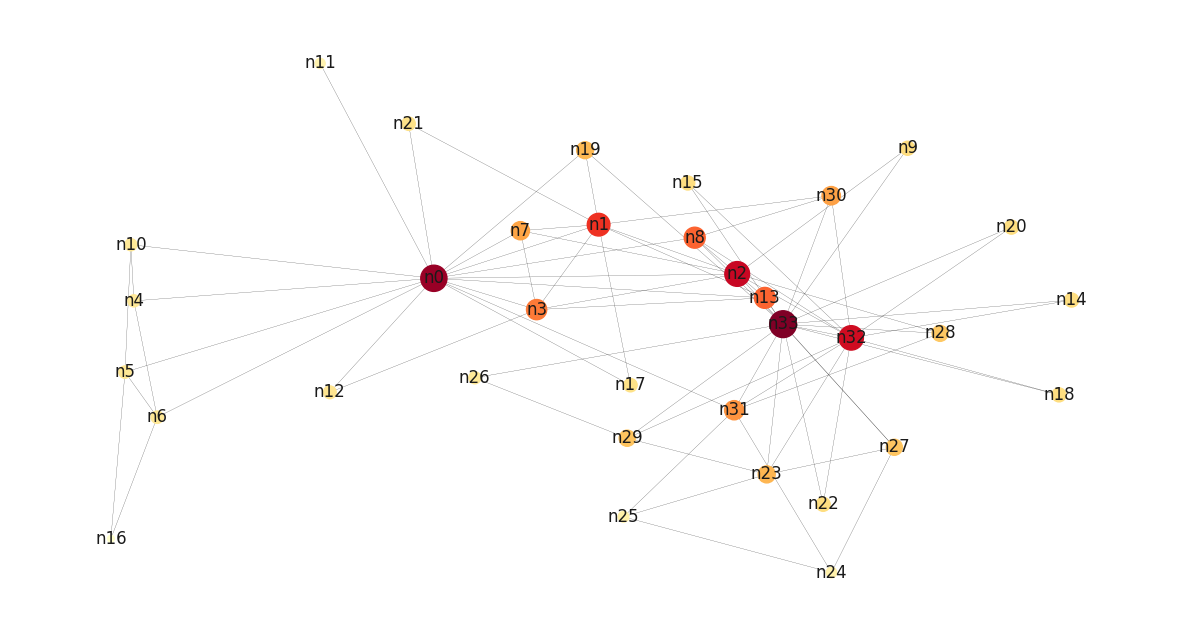

In [13]:
min_value = np.min([v for v in eigenvector_c.values()])
max_value = np.max([v for v in eigenvector_c.values()])
factor = 1 / max_value
mapped_values = [(v - min_value)*255*factor for v in eigenvector_c.values()]
node_size =  [v * 1000 for v in eigenvector_c.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(karate_undirected, pos=pos_karate, node_color=mapped_values, 
                 node_size=node_size, with_labels=True, width=0.15, cmap=plt.cm.YlOrRd) # YlOrRd, gist_heat, eismic, viridis
plt.axis('off')

## Centralidad de Katz

Katz centrality computes the centrality for a node based on the centrality of its neighbors. It is a generalization of the eigenvector centrality. The Katz centrality for node *i* is
$$x_i = \alpha \sum_{j}^{} A_{ij} x_{i} + \beta$$
where *A* is the adjacency matrix of graph *G* with eigenvalues *λ*.

The parameter *β* controls the initial centrality and katz_centrality
$$ \alpha < \frac {1}{\lambda} $$



In [14]:
katz_c = nx.katz_centrality(karate_undirected, max_iter=10000)
sorted_katz = sorted(katz_c.items(), key=lambda item: item[1], reverse=True)
sorted_katz[:10]

[('n33', 0.33140639752189366),
 ('n0', 0.32132459695923254),
 ('n32', 0.27508514346623925),
 ('n2', 0.26576588481542884),
 ('n1', 0.23548425319449465),
 ('n8', 0.20071781096610813),
 ('n13', 0.19937368057318852),
 ('n3', 0.19491320249172545),
 ('n31', 0.1938016017020055),
 ('n30', 0.16875361802889588)]

Text(0, 0.5, 'Counts')

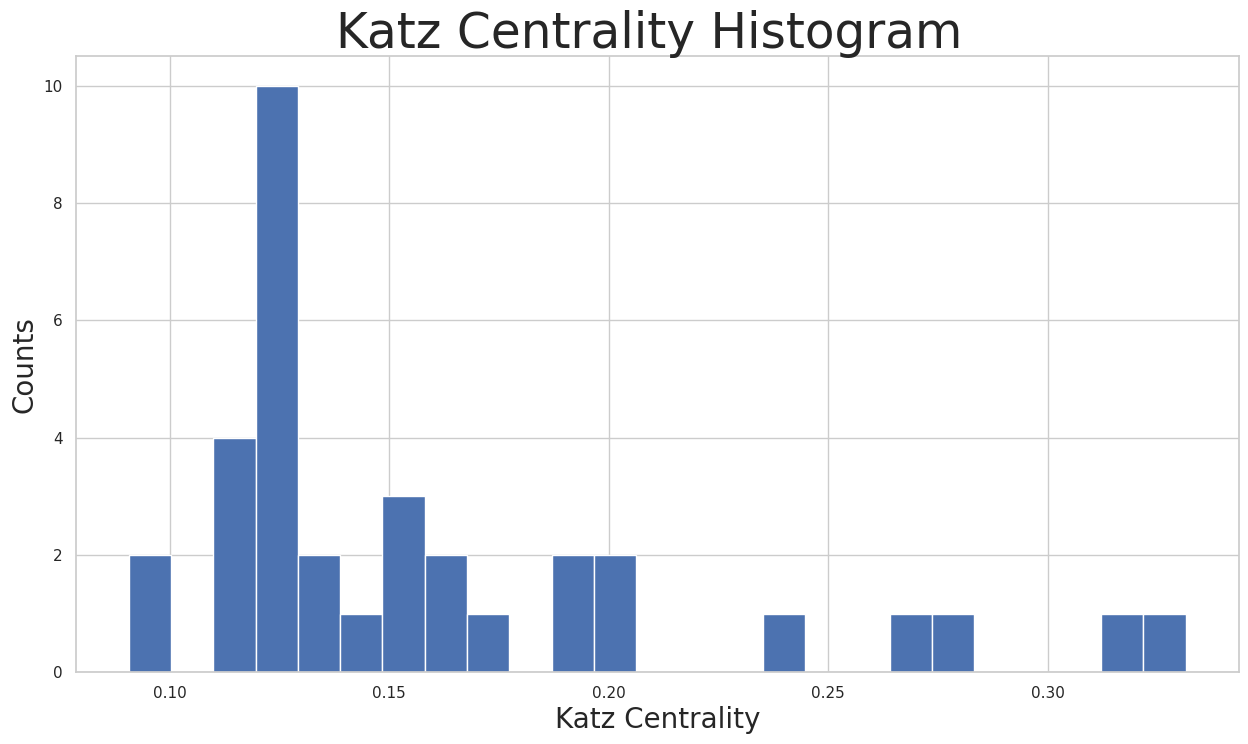

In [15]:
plt.figure(figsize=(15,8))
plt.hist([v for v in katz_c.values()], bins=25) 
plt.title('Katz Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Katz Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

(-11.974948366841378, 10.783980431997353, -8.88806008653366, 9.261304725773643)

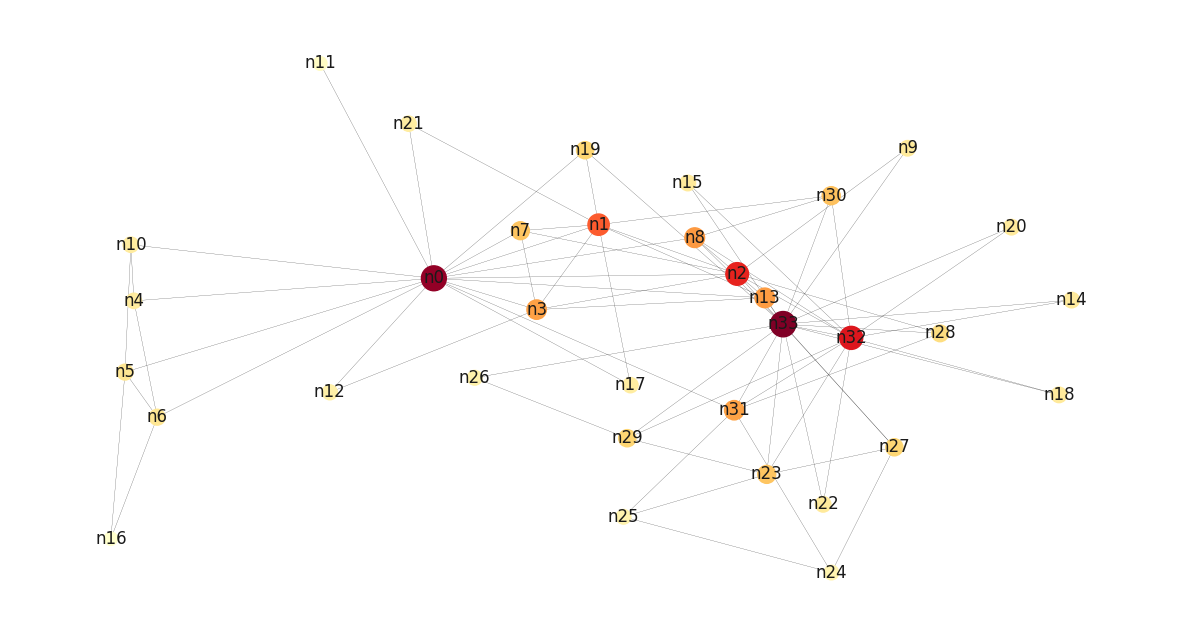

In [16]:
min_value = np.min([v for v in katz_c.values()])
max_value = np.max([v for v in katz_c.values()])
factor = 1 / max_value
mapped_values = [(v - min_value)*255*factor for v in katz_c.values()]
node_size =  [v * 1000 for v in katz_c.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(karate_undirected, pos=pos_karate, node_color=mapped_values, 
                 node_size=node_size, with_labels=True, width=0.15, cmap=plt.cm.YlOrRd) # YlOrRd, gist_heat, eismic, viridis
plt.axis('off')

## Centralidad de Cercanía

In [17]:
closeness_c = nx.closeness_centrality(karate_undirected)
sorted_closeness = sorted(closeness_c.items(), key=lambda item: item[1], reverse=True)
sorted_closeness[:10]

[('n0', 0.5689655172413793),
 ('n2', 0.559322033898305),
 ('n33', 0.55),
 ('n31', 0.5409836065573771),
 ('n8', 0.515625),
 ('n13', 0.515625),
 ('n32', 0.515625),
 ('n19', 0.5),
 ('n1', 0.4852941176470588),
 ('n3', 0.4647887323943662)]

Text(0, 0.5, 'Counts')

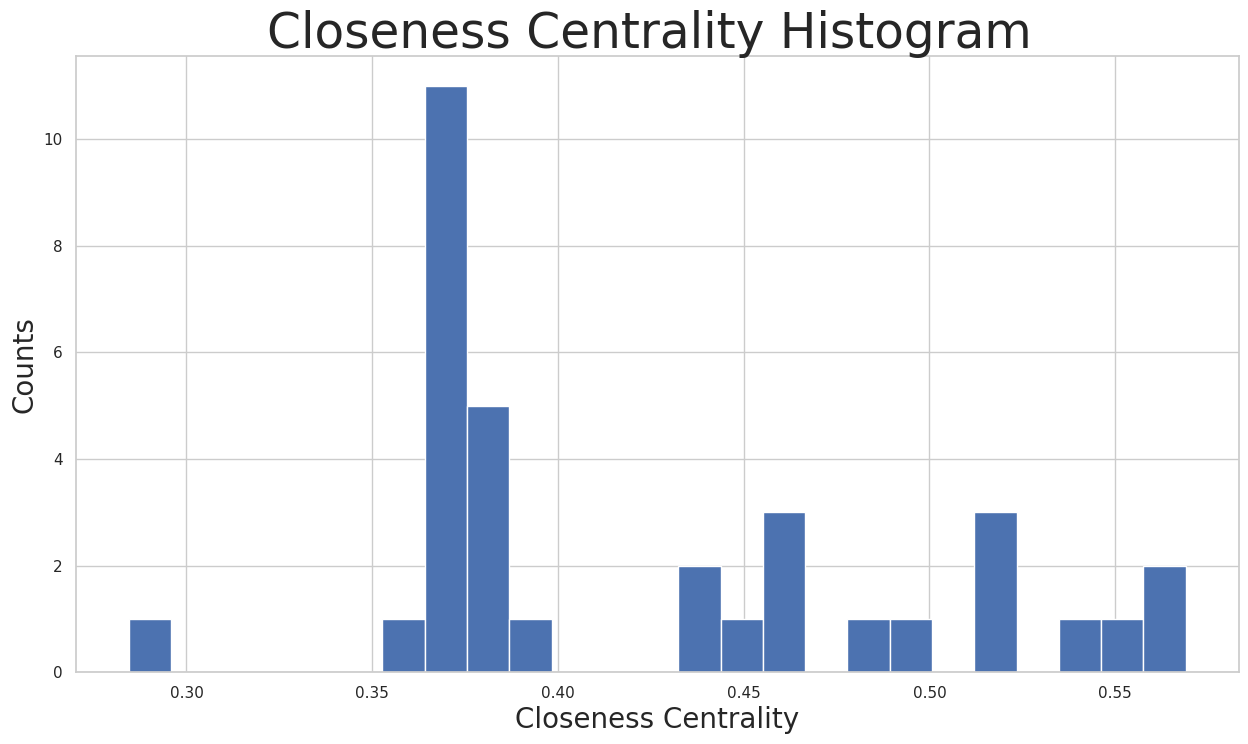

In [18]:
plt.figure(figsize=(15,8))
plt.hist([v for v in closeness_c.values()], bins=25) 
plt.title('Closeness Centrality Histogram ', fontdict ={'size': 35}, loc='center') 
plt.xlabel('Closeness Centrality', fontdict ={'size': 20})
plt.ylabel('Counts',fontdict ={'size': 20})

(-11.974948366841378, 10.783980431997353, -8.88806008653366, 9.261304725773643)

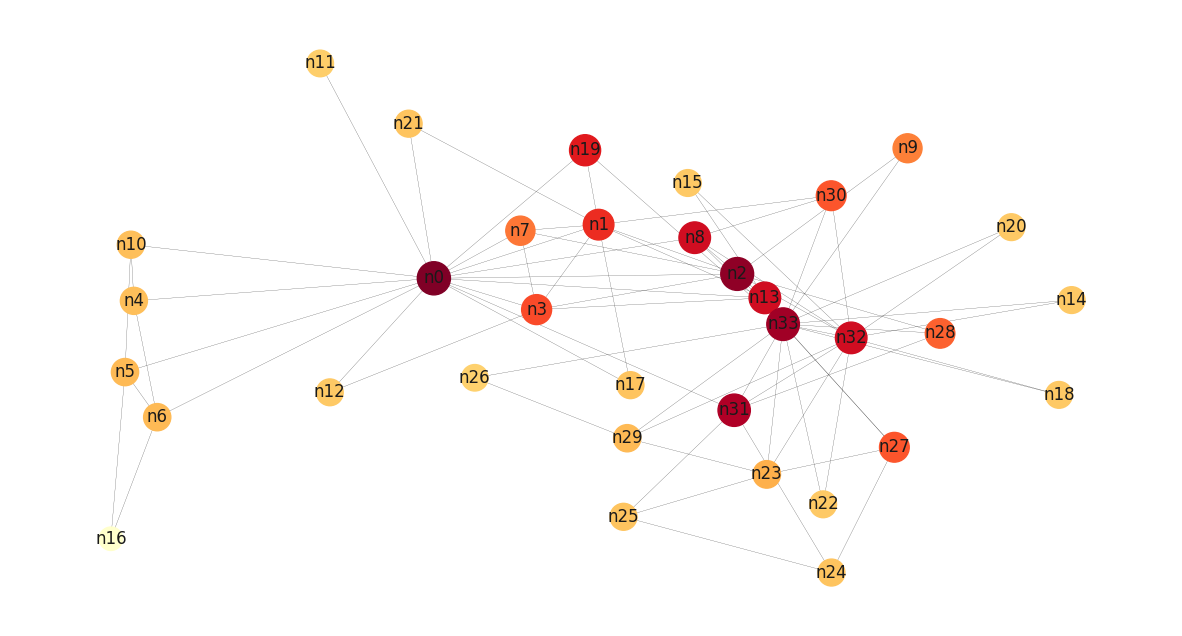

In [19]:
min_value = np.min([v for v in closeness_c.values()])
max_value = np.max([v for v in closeness_c.values()])
factor = 1 / max_value
mapped_values = [(v - min_value)*255*factor for v in closeness_c.values()]
node_size =  [v * 1000 for v in closeness_c.values()]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(karate_undirected, pos=pos_karate, node_color=mapped_values, 
                 node_size=node_size, with_labels=True, width=0.15, cmap=plt.cm.YlOrRd) # YlOrRd, gist_heat, eismic, viridis
plt.axis('off')

## Combinando resultados

Vamos a utilizar centralidad de grado, cercanía e intermediación.
En vez de centralidad de grado se podría usar Vector Propio, Katz o PageRank

In [20]:
# Ordeno los resultados para darles peso
# Lo hago de menor a mayor así cuando más centralidad tiene, ocupa una posición más alta en la lista
ranking_degree = [ degree[0] for degree in sorted(degree_c.items(), key=lambda item: item[1])]
weight_degree = [ ranking_degree.index('n' + str(i))for i in range(34)]
ranking_betweenness =  [ degree[0] for degree in sorted(betweenness_c.items(), key=lambda item: item[1])]
weight_betweenness = [ ranking_betweenness.index('n' + str(i))for i in range(34)]
ranking_closeness =  [ degree[0] for degree in sorted(closeness_c.items(), key=lambda item: item[1])]
weight_closeness = [ ranking_closeness.index('n' + str(i))for i in range(34)]
combined_weight = np.add(weight_degree, weight_betweenness)
combined_weight = np.add(combined_weight, weight_closeness)
combined_weight
sorted(katz_c.items(), key=lambda item: item[1], reverse=True)

[('n33', 0.33140639752189366),
 ('n0', 0.32132459695923254),
 ('n32', 0.27508514346623925),
 ('n2', 0.26576588481542884),
 ('n1', 0.23548425319449465),
 ('n8', 0.20071781096610813),
 ('n13', 0.19937368057318852),
 ('n3', 0.19491320249172545),
 ('n31', 0.1938016017020055),
 ('n30', 0.16875361802889588),
 ('n23', 0.1667906480987158),
 ('n7', 0.16623305202689406),
 ('n19', 0.15330578770069545),
 ('n29', 0.1531060365504152),
 ('n27', 0.15190166582081863),
 ('n28', 0.14358165473533302),
 ('n5', 0.13097227932864922),
 ('n6', 0.13097227932864922),
 ('n14', 0.12513342642033798),
 ('n15', 0.12513342642033798),
 ('n18', 0.12513342642033798),
 ('n20', 0.12513342642033798),
 ('n22', 0.12513342642033798),
 ('n9', 0.12420150029869699),
 ('n4', 0.12190440564948415),
 ('n10', 0.12190440564948415),
 ('n17', 0.12016515915440101),
 ('n21', 0.12016515915440101),
 ('n12', 0.11610805572826274),
 ('n26', 0.11293552094158045),
 ('n25', 0.11156461274962844),
 ('n24', 0.11021106930146939),
 ('n11', 0.0966167418

In [21]:
data = {'Name': [node for node in karate_undirected.nodes],
        'Degree': degree_c.values(),
        'Betweenness': betweenness_c.values(),
        'Closeness': closeness_c.values(),
        'Combined': combined_weight}
tabla = pd.DataFrame(data)
tabla_ordenada = tabla.sort_values('Combined', ascending=False)
tabla_ordenada

,Name,Degree,Betweenness,Closeness,Combined
0,n0,0.484848,0.437635,0.568966,98
33,n33,0.515152,0.304075,0.550000,96
2,n2,0.303030,0.143657,0.559322,92
32,n32,0.363636,0.145247,0.515625,91
31,n31,0.181818,0.138276,0.540984,87
1,n1,0.272727,0.053937,0.485294,81
13,n13,0.151515,0.045863,0.515625,79
8,n8,0.151515,0.055927,0.515625,79
3,n3,0.181818,0.011909,0.464789,70
30,n30,0.121212,0.014412,0.458333,66


(-11.974948366841378, 10.783980431997353, -8.88806008653366, 9.261304725773643)

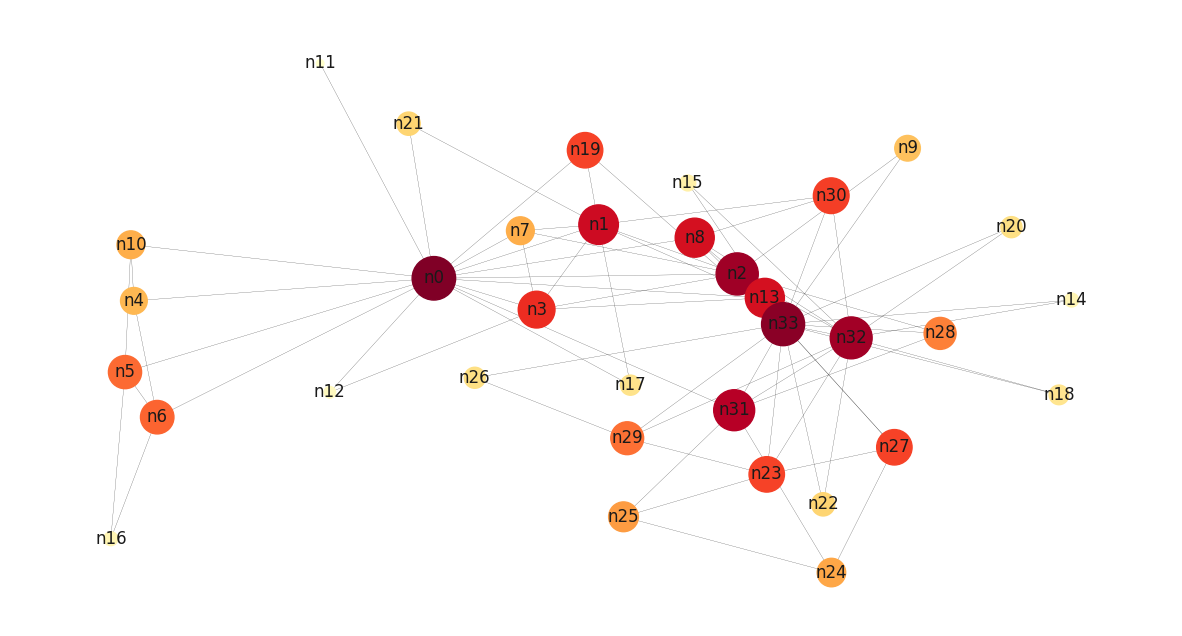

In [22]:
min_value = np.min(combined_weight)
max_value = np.max(combined_weight)
factor = 1 / max_value
color_values = [(v - min_value)*255*factor for v in combined_weight]
node_size =  [v * 10 for v in combined_weight]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15,8))
nx.draw_networkx(karate_undirected, pos=pos_karate, node_color=color_values, 
                 node_size=node_size, with_labels=True, width=0.15, cmap=plt.cm.YlOrRd) # YlOrRd, gist_heat, eismic, viridis
plt.axis('off')

# Análisis de Arcos

## Puentes

A bridge in a graph is an edge whose removal causes the number of connected components of the graph to increase. Equivalently, a bridge is an edge that does not belong to any cycle. Bridges are also known as cut-edges, isthmuses, or cut arcs.

In [23]:
# Comprobamos si hay alguno
bridges = list(nx.bridges(karate_undirected))
len(bridges)

1

Iterate over local bridges of G optionally computing the span
A local bridge is an edge whose endpoints have no common neighbors. That is, the edge is not part of a triangle in the graph.
The span of a local bridge is the shortest path length between the endpoints if the local bridge is removed.

In [24]:
local_bridges = list(nx.local_bridges(karate, with_span=False))
len(local_bridges)

11

(-11.974948366841378, 10.783980431997353, -8.88806008653366, 9.261304725773643)

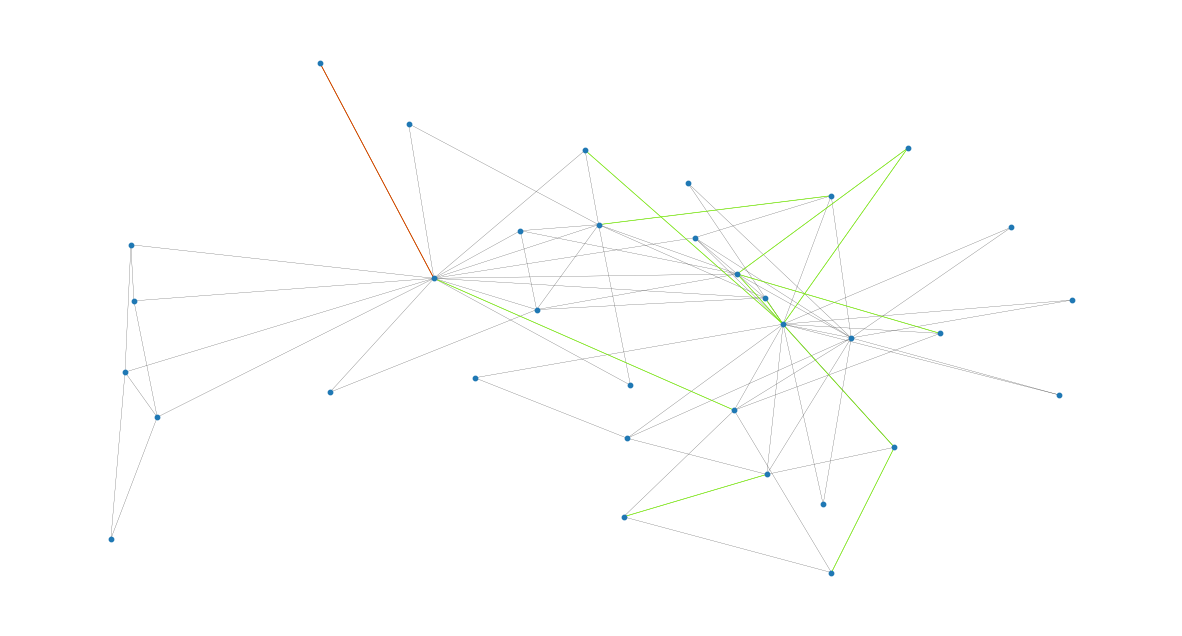

In [25]:
plt.figure(figsize=(15,8))
nx.draw_networkx(karate, pos=pos_karate, node_size=10, with_labels=False, width=0.15)
nx.draw_networkx_edges(karate, pos_karate, edgelist=local_bridges, width=0.5, edge_color="lawngreen")  # green color for local bridges 
nx.draw_networkx_edges(karate, pos_karate, edgelist=bridges, width=0.5, edge_color="red")  # red color for bridges
plt.axis('off')